In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore') 

In [7]:
data = pd.read_csv("aiq.csv")
data


,Unnamed: 0,sampling_date,state,location,type,so2,no2,rspm,location_monitoring_station,date
0,1036,1/2/2004,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2/1/2004
1,1037,1/5/2004,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",5/1/2004
2,1038,1/9/2004,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",9/1/2004
3,1039,1/12/2004,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",12/1/2004
4,1040,16-01-04,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",1/16/2004
...,...,...,...,...,...,...,...,...,...,...
363531,435734,15-12-15,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,"Inside Rampal Industries,ULUBERIA",12/15/2015
363532,435735,18-12-15,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,"Inside Rampal Industries,ULUBERIA",12/18/2015
363533,435736,21-12-15,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,"Inside Rampal Industries,ULUBERIA",12/21/2015
363534,435737,24-12-15,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,"Inside Rampal Industries,ULUBERIA",12/24/2015


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363536 entries, 0 to 363535
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   363536 non-null  int64  
 1   sampling_date                363536 non-null  object 
 2   state                        363536 non-null  object 
 3   location                     363536 non-null  object 
 4   type                         363536 non-null  object 
 5   so2                          363536 non-null  float64
 6   no2                          363536 non-null  float64
 7   rspm                         363536 non-null  float64
 8   location_monitoring_station  363536 non-null  object 
 9   date                         363536 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 27.7+ MB


In [9]:
data.state = data.state.replace({'Uttaranchal':'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

In [10]:
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)
data.head()

,Unnamed: 0,sampling_date,state,location,type,so2,no2,rspm,location_monitoring_station,date
0,1036,1/2/2004,Andhra Pradesh,Hyderabad,I,12.9,55.8,143.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",2/1/2004
1,1037,1/5/2004,Andhra Pradesh,Hyderabad,I,10.4,48.9,124.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",5/1/2004
2,1038,1/9/2004,Andhra Pradesh,Hyderabad,I,7.6,50.1,88.0,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",9/1/2004
3,1039,1/12/2004,Andhra Pradesh,Hyderabad,I,7.3,48.5,82.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",12/1/2004
4,1040,16-01-04,Andhra Pradesh,Hyderabad,I,6.8,110.3,122.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",1/16/2004


In [11]:
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [13]:
VALUE_COLS = ['so2', 'no2', 'rspm']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

nan_cols = data[VALUE_COLS].columns[data[VALUE_COLS].isnull().all()].tolist()

VALUE_COLS = [col for col in VALUE_COLS if col not in nan_cols]

imputed_data = imputer.fit_transform(data[VALUE_COLS])

imputed_df = pd.DataFrame(imputed_data, columns=VALUE_COLS, index=data.index)

data[VALUE_COLS] = imputed_df[VALUE_COLS]

In [14]:
print(data.isnull().sum())
data.tail()

Unnamed: 0                     0
sampling_date                  0
state                          0
location                       0
type                           0
so2                            0
no2                            0
rspm                           0
location_monitoring_station    0
date                           0
dtype: int64


,Unnamed: 0,sampling_date,state,location,type,so2,no2,rspm,location_monitoring_station,date
363531,435734,15-12-15,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,"Inside Rampal Industries,ULUBERIA",12/15/2015
363532,435735,18-12-15,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,"Inside Rampal Industries,ULUBERIA",12/18/2015
363533,435736,21-12-15,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,"Inside Rampal Industries,ULUBERIA",12/21/2015
363534,435737,24-12-15,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,"Inside Rampal Industries,ULUBERIA",12/24/2015
363535,435738,29-12-15,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,"Inside Rampal Industries,ULUBERIA",12/29/2015


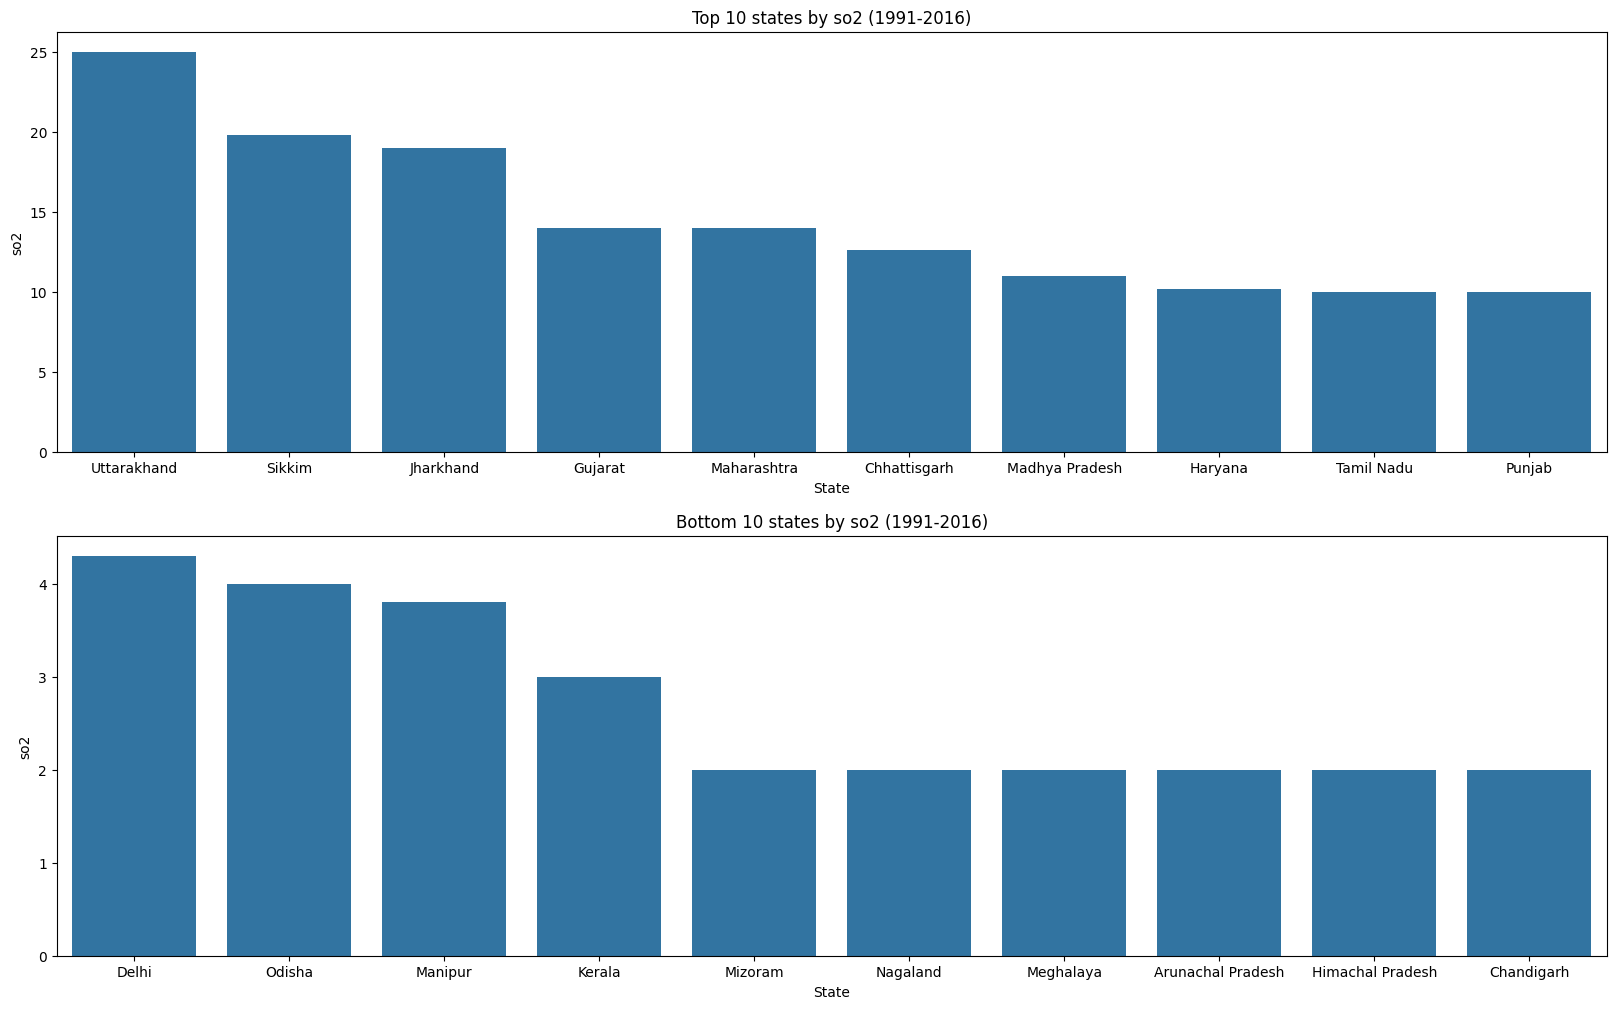

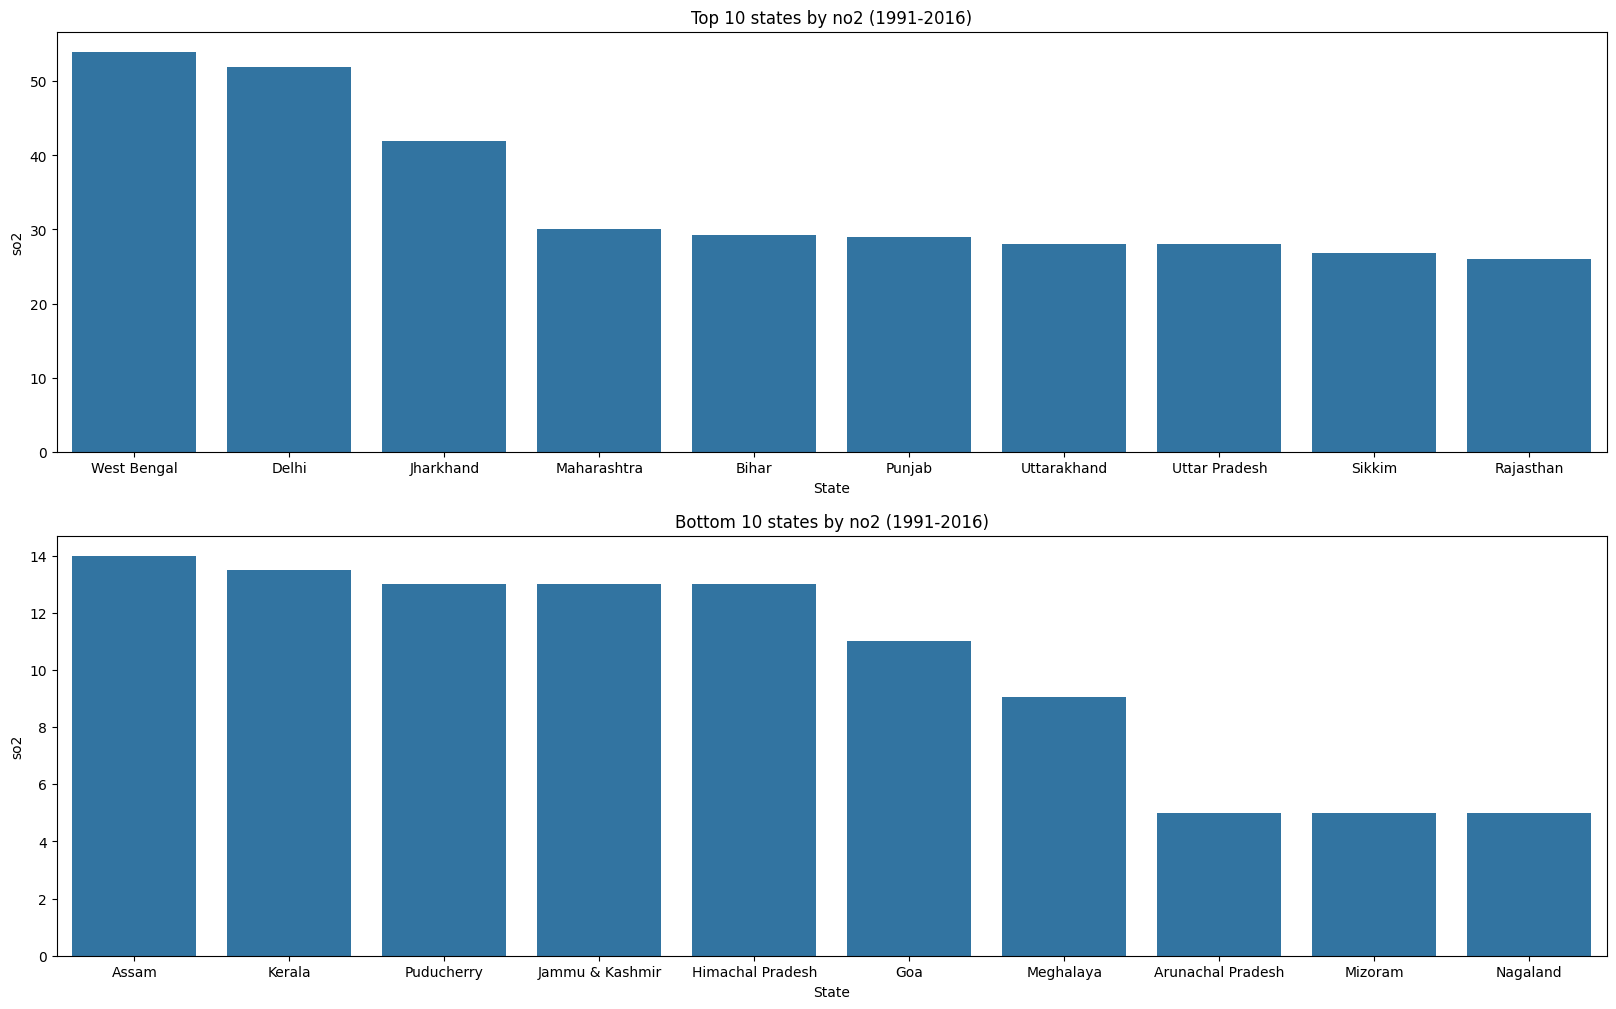

In [15]:

def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0])
    top10.set_title(f"Top 10 states by {indicator} (1991-2016)")
    top10.set_ylabel("so2")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1])
    bottom10.set_title(f"Bottom 10 states by {indicator} (1991-2016)")
    bottom10.set_ylabel("so2")
    bottom10.set_xlabel("State")

top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

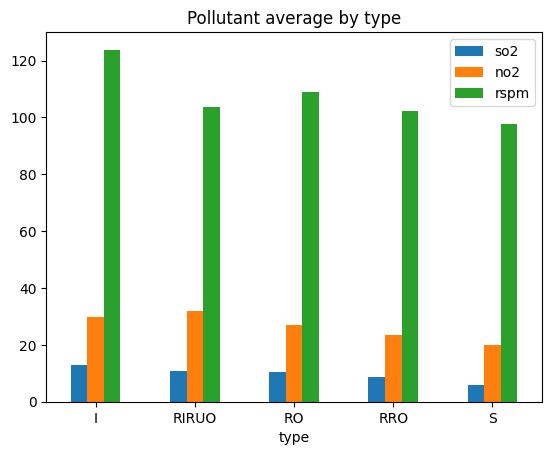

In [16]:
def type_avg(indicator=""):
    type_avg = data[VALUE_COLS + ['type']].groupby("type").mean()  
    if not indicator:
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

type_avg('so2')

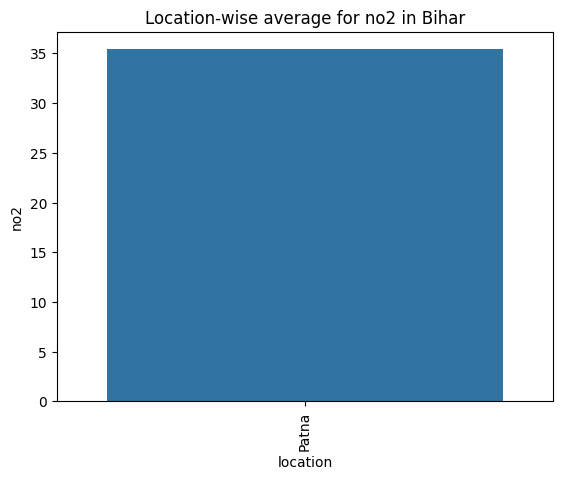

In [19]:
def location_avgs(state, indicator="so2"):
    numerical_cols = VALUE_COLS + ['state', 'location']
    locs = data[numerical_cols].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation = 90)

location_avgs("Bihar" , "no2")